# FTML Project Exercise 2

For this exercise, we will study the behavior of the Bayes Risk with absolute loss.

## Question 0

For this exercise, we will use the following function:

$$
f(x) = S * (x - 7)^3
$$

With S a natural random variable following a uniform distribution in \[1;9\]. This function is derivable as follow:

$$
f'(x) = 3S * (x - 7)^2
$$

It therefore admits a 0 derivative for x0 = 7, without x = 7 being a local extremum. Let us plot this function:

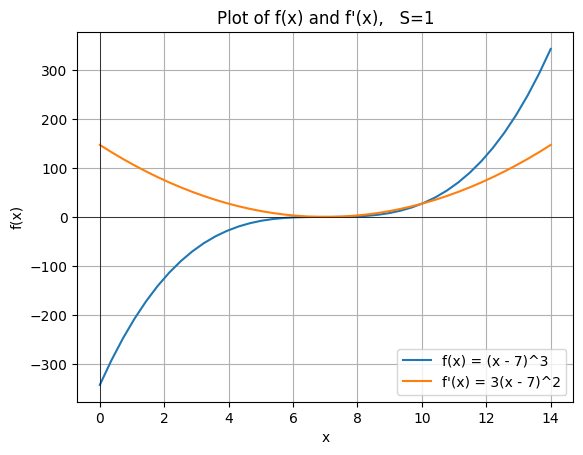

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return (x - 7)**3

def f_derivative(x) :
    return 3 * (x - 7)**2

# Create a range of x values
x = np.linspace(0, 14, 40)
y = f(x)
z = f_derivative(x)

# Plot the function
plt.plot(x, y, label='f(x) = (x - 7)^3')
plt.plot(x, z, label='f\'(x) = 3(x - 7)^2')
plt.title('Plot of f(x) and f\'(x),   S=1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5)  # x-axis
plt.axvline(0, color='black', linewidth=0.5)  # y-axis
plt.grid(True)
plt.legend()
plt.show()

## Question 1

Let us define an estimator h as follow:

$$
h(x) = 
$$